In [1]:
import matplotlib.pyplot as plot
import healpy as hp
#from BurstCube.LocSim.GRB import *
from BurstCube.LocSim.Detector import *
#from Detector import *
from BurstCube.LocSim.Spacecraft import *
from BurstCube.LocSim.Stats import calcNorms, addErrors, calcNormsWithError

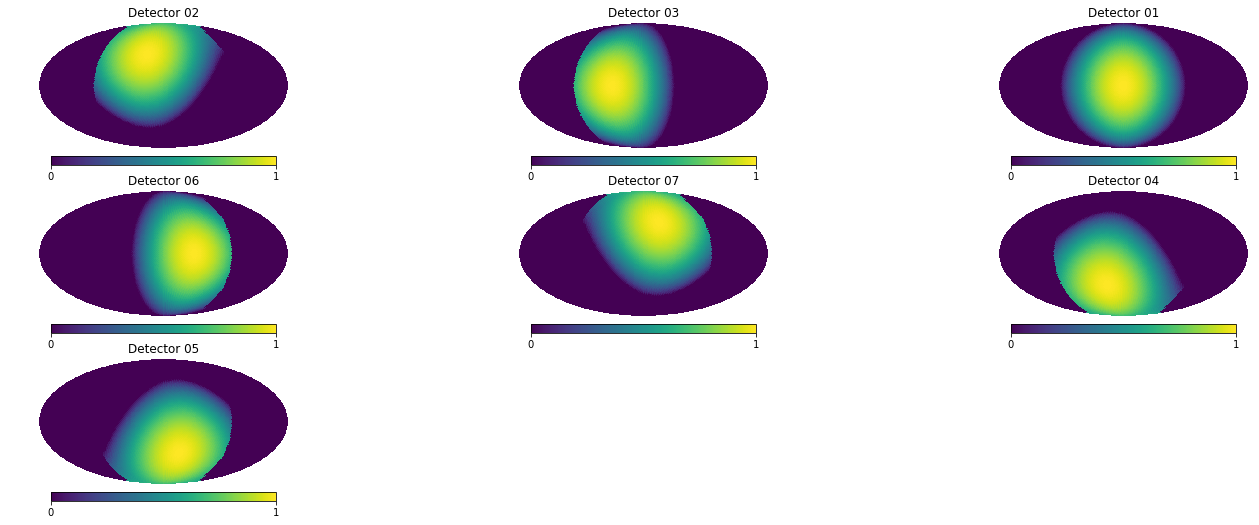

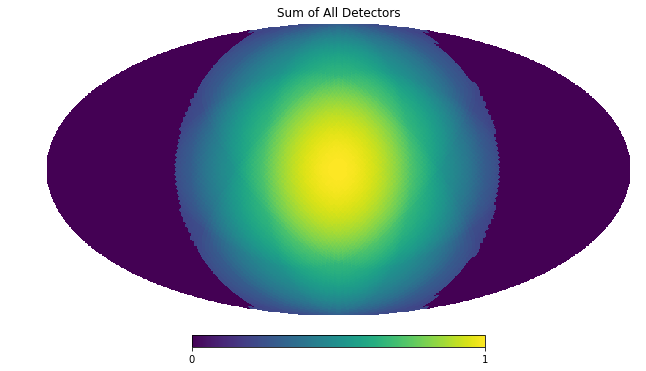

In [2]:
## setup bcp
## 7 detectors 
pointings =  {'01': ('0:0:0','0:0:0'),
            '02': ('30:0:0','45:0:0'),
            '03': ('90:0:0','45:0:0'),
            '04': ('150:0:0','45:0:0'),
            '05': ('210:0:0','45:0:0'),
            '06': ('270:0:0','45:0:0'),
            '07': ('330:0:0','45:0:0')}

npointings=len(pointings)
spacecraft = Spacecraft(pointings,lat='00:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
exposures = np.array([[ detector.exposure(position[0],position[1], alt=-10.) for position in exposure_positions.T] 
                      for detector in spacecraft.detectors])

plot.figure(figsize=(20,npointings))
for i in range(npointings):
    hp.mollview(exposures[i]/max(exposures[i]), max=1,title='Detector '+pointings.keys()[i],sub = int('33'+str(i+1)))
s=exposures.sum(axis=0)
fs=(s-min(s))/max(s)
hp.mollview(fs,title='Sum of All Detectors')

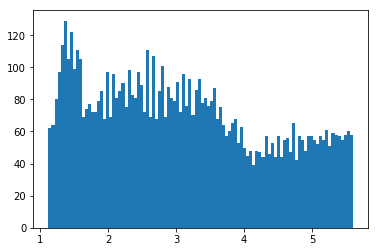

0.2436484798


In [3]:
a=exposures.sum(axis=0)[exposures.sum(axis=0)>0]
plot.figure()
plot.hist(a,bins=100)
plot.show()
print float(len(a[a<2]))/len(a)